# Study of 3D Quantum Scattering

Laskos-Patkos Pavlos

MSc Computational Physics 

May 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import jv,yv,eval_legendre
from math import ceil

### 1. Introduction

When it comes to nuclear and particle physics, theory is tested through scattering experiments. Scattering, in physics,is a change in the direction of motion of a particle because of a collision with another particle. 
The reason scattering is of great interest is because it connects theoretically calculated quantities(partial waves) with quantities that we can measure. In this work we are going to present the theoretical framework and formalism concerning quantum scattering(QS) and we are going to provide a series of numerical calculations for the total and the differential cross section with respect to the energy and angle.

### 2. Quantum Scattering

##### 2.1 Cross section
In a scattering experiment we assume that we have a linear beam of particles, with determined energy and momentum, which interact with a target(through a potential V(r)), altering it's direction. At this point we are going to give the definition of some key elements concerning QS.

**Differential Cross Section**

As differential cross section we define the fraction of $dN$ scattered particles in a ster angle $d\Omega$ over the current density $J$ of the incident wave.

$$ \frac{d\sigma}{d\Omega}=\frac{(dN)_{sc}}{j_{inc}d\Omega} \tag{2.1.1}$$

**Total Cross Section**

Total cross section can be calculated from the integration of the above formula. Therefore

$$ \sigma = \int \frac{d\sigma}{d\Omega}d\Omega \tag{2.1.2}$$

The physical interpretation of the total cross section,which has $Length^2$ units, is that it represents the area in which the interaction causing scattering occurs.

##### 2.2 Asymptotic Condition and Scattering Amplitude 

In a scattering experiment with have a beam of particles with energy $E>0$ and a target that it is concidered to be at the begining of the reference frame. In order to study the motion of the beam we have to solve the Schrodinger Equation for a specific potential $V(r)$ which depends on the interaction. Therefore we need to solve the following equation

$$(\nabla^2+k^2)u(r)=\frac{2\mu V(r)}{\hbar^2}u(r), \hspace{1 cm} \mu=\frac{m_1m_2}{m_1+m_2},\hspace{0.1 cm} k=\frac{2\mu E}{\hbar^2} \tag{2.2.1}$$

Assuming that the potential is 0 when $r\rightarrow \infty$ the equation to a simpler form which gives the solution

$$u_{\infty}(r)=e^{ikz}+f(\theta)\frac{e^{ikr}}{r} \tag{2.2.2}$$

where the first term and second term stand for the incident and the scattered wave respectively. The function $f(\theta)$ is defined as the scattering amplitude.
We can calculate the number of scattered baryons through $dN_{sc}=j_{sc}d\Omega$. By employing the following expression of the current density

$$j = -\frac{i\hbar}{2m}(u^*\nabla{u}-u\nabla{u^*}) \tag{2.2.3}$$

and combining it with (2.2.2) it is straighforword to prove the connection between the scattering amplitude and the differential cross section

$$\frac{d\sigma}{d\Omega}=|f(\theta)|^2 \tag{2.2.4}$$

##### 2.3 Partial Wave Analysis

For a central potential the solution of Schrodinger equation can be writen as 

$$u_{klm}=R_{klm}(r)Y^l_m(\theta,\phi) \rightarrow u_k(r,\theta,\phi)=\sum_{lm} C_{klm}R_{klm}(r)Y^l_m(\theta,\phi) \tag{2.3.1}$$

Because the incident wave is travelling in z-axis the only term of spherical harmonics that contributes is that for m=0. Since $Y^0_l=\sqrt{\frac{2l+1}{4\pi}}P_l(cos(\theta))$, where $P_l$ stands for the Legrende polyonymials, it is straightforward that

$$ u_k(r,\theta)=\sum_{l} C_{l}R_{klm}(r)P_l(cos(\theta)) \tag{2.3.2}$$

Firstly we are going to examine the asympotic behavior of the radial Schrodinger Equation which is presented below(we assume that $V(r)=0$ for $r\rightarrow \infty$)

$$\frac{d^2R_{klm}}{dr^2}+\frac{2}{r}\frac{dR_{klm}}{dr}+[k^2-\frac{l(l+1)}{r^2}]R_{klm}=0 \tag{2.3.3}$$

This equation has the analytical solution 

$$R_{kl}(r)=A_lj_{l}(kr)+B_ln_l(kr) \tag{2.3.4}$$

where $j_{l}$ and $n_l$ stand for the spherical Bessel and Neumann functions. By employing the asympotic forms for the special functions of eq. (2.3.4) we get 

$$R_{kl}(r)=A_lsin(kr-l\frac{\pi}{2})+B_lcos(kr-l\frac{\pi}{2}),\hspace{1 cm} r \rightarrow \infty \tag{2.3.5}$$

and if we substitute $-\frac{B_l}{A_l}=tan(\delta_l)$ we end up with

$$R_{kl}(r)=C_l\frac{1}{kr}sin(kr-l\frac{\pi}{2}+\delta_l) \tag{2.3.6}$$

Combining eq. (2.3.2) and eq. (2.3.6) 

$$u_k(r,\theta)=\sum_{l}C_{l}\frac{1}{kr}sin(kr-l\frac{\pi}{2}+\delta_l)P_l(cos\theta) $$

##### 2.4 Expressing the Incident Wave in terms of Legrende Polyonymials

Since the Hamiltonian is a hermitian operator, it's eigenfunctions for a complete and orthogonal set. There we can exress the plane wave as a linear combination of the eigenfunction for the free partical. For a free particle

$$R_{kl}^{(0)} = A_lj_l(kr)+B_ln_l(kr) \tag{2.4.1}$$

Since for $r \rightarrow 0$ the Spherical Neumann function goes to infinity $B_l$ should be 0.
So we can right for the plane wave

$$e^{ikz}=e^{ikrcos(\theta)}=\sum_l C_{lm}^{(0)}R_l^{(0)}(r)Y^l_m(\theta,\phi) \rightarrow e^{ikz} = \sum_l C_{l}^{(0)}j_l(kr)P_l(cos(\theta)) \tag{2.4.2}$$

By multipling with $P_{l'}cos(\theta)$ and integrating both parts we can calculate that $C_l^{(0)}=i^l(2l+1)$. Therefore for $r \rightarrow \infty$ 

$$e^{ikz} = \sum_l i^l(2l+1)sin(kr-l\frac{\pi}{2})P_l(cos(\theta)) \tag{2.4.3}$$
##### 2.5 Calculating the Cross Section

We arrived at two different results for the asymptotic behavior for the wave function of a particle scattered by a central potential.

Specifically for $r \rightarrow \infty$

$$u_k(r,\theta)=\sum_{l}C_{l}\frac{1}{kr}sin(kr-l\frac{\pi}{2}+\delta_l)P_l(cos\theta) \tag{2.5.1}$$

$$u(r,\theta)=e^{ikz}+f(\theta)\frac{e^{ikr}}{r} \tag{2.5.2}$$

By equating eq. (2.5.1) and eq. (2.5.2) we can show that 

$$ f(\theta) = \frac{1}{k}\sum_l (2l+1)e^{i\delta_l}sin(\delta_l)P_l(cos\theta)\tag{2.5.3}$$

Then from eqs (2.2.4), (2.1.2) we get that

$$\sigma = \int |f(\theta)|^2 d\Omega= \frac{4\pi}{k^2}\sum_l(2l+1)sin^2(\delta_l)\tag{2.5.4}$$

For an incident wave of low energy only the first terms of the series in eq (2.5.4) are going to contribute and therefore we can calculate the total cross section. 


In [2]:
#Constants
r0 = 2
c = 0.26247
e = np.sqrt(14.409)
npoints = 51
Estart = 0.1

### 3. Potential for Electron Scattering

The potential that we our going to use to describe the interaction between electrons and a nucleus with atomic number Z is the Lens-Jensen potential

$$V(r)=-\frac{Ze^2}{r}exp(-x)(1+x+0.3344 x^2+0.0485x^3+0.002647x^4) \tag{3.1.1}$$

where 

$$x=x(r)=4.5397Z^{1/6}r^{1/2} \tag{3.1.2}$$

In [3]:
#Potential Energy

def x(Zcharge,r):
    return 4.5397*Zcharge**(1/6)*r**(1/2)

def V(Zcharge,r):
    return -Zcharge*e**2*np.exp(-x(Zcharge,r))*(1+x(Zcharge,r)+
                                                0.3344*x(Zcharge,r)**2+0.0485*x(Zcharge,r)**3+0.002647*x(Zcharge,r)**4)/r

In [4]:
#Solving the radial Schrondinger Equation for different Energy and Momentum(l)
def radial_diff_equation(t,y,Energy,Zcharge,ln):
    
    u = y[0]
    y = y[1]
    
    dudr = y
    dydr = (-c*(Energy-V(Zcharge,t))+ln*(ln+1)/t**2)*u
    
    return [dudr,dydr]        

In [5]:
#Defining spherical Bessel and Neumann functions
def Spherical_Bessel(l,z):
    return np.sqrt(np.pi/(2*z))*jv(l+1/2,z)

def Spherical_Neumann(l,z):
    return np.sqrt(np.pi/(2*z))*yv(l+1/2,z)

In [6]:
#Creating a list of the atomic numbers we are going to use and the Energy Range that we are going to study
Z = [20,50,70]

def Estop(x):
    if x==20: return 10
    elif(x==50): return 50.1
    else: return 100

In [7]:
#Angles for diffential cross section
theta = np.linspace(0,np.pi,20)
angles = len(theta)
diff_nums = 3

### 4. Numerical Solution

#### 4.1 Radial Schrodinger Equation
It is obvious that in order to calculate the phase shifts we need to solve the radial Schrodinger Equation. If we substitute in eq. (2.3.3)(considering $V \neq 0$)$R_kl=\phi(r)/r$ we obtain

$$\frac{d^2\phi_{kl}}{dr^2}+[k^2-\frac{2\mu}{\hbar^2}V(r)-\frac{l(l+1)}{r^2}]\phi_{kl}=0 \tag{4.1.1}$$

#### 4.2 Max Angular Momentum Contribution
In order to calculate the cross section we need to solve numerically the Schrodinger Equation for a series of different angular momentum l. The question that rises from that is how many values of angular momentum are we going to use. To answer this we will make a classical analogy. Imagine a beam moving in a parallel trajectory with the z-axis in a distance $b$. It's angluar momentum would be $|\boldsymbol{l}|=pb$. Since we consider a potential with finite range $r_0$ a beam travelling at a distance $r>b$ won't be affected. Also we note that $|\boldsymbol{l}|^2=\hbar l(l+1)$. Therefore the max number $l$ that contributes to the total cross section can be found as

$$\sqrt{l(l+1)} = kr_0 \rightarrow l_{max} \approx kr_0 \tag{4.2.1}$$

#### 4.3 Initial Conditions

A serious issue that we need focus our interest is that when $r \rightarrow 0$ the centefugitive term goes to infinity. Therefore the integration should start not from r = 0 but from a point in that area. Notice that in a case where the potential is finite or tends to infinity slower than the centefugitive term while $r \rightarrow 0$ we can find an approximate solution. Assuming that $l(l+1)/r^2>>V(r), r \rightarrow 0$ the radial Schodinger equation reads

$$\frac{d^2\phi}{dr^2}-\frac{l(l+1)}{r^2}u=0 \tag{4.3.1}$$

If we attempt to obtain a solution of the form $u(r)=r^s$ we end up with

$$\phi(r)=r^{l+1}, \hspace{1 cm} |r|<<1 \tag{4.3.2}$$

Note that now the integration can be initiated from a point close to zero. It is important though to change it's value for different l value cause due to the power law dependance $u(r_{start})$ might be too small and cause numerical instabillities.

#### 4.4 Calculation of Phase Shifts

From the analysis done before it is obvious that within the range of the potential we have a solution of the Schrodinger equation $R_{kl}(r),\hspace{0.2 cm} r<r_0$ and for the area outside the range we have the asymptotic solution $R_{kl}(r)=C_l(cos(\delta_l)j_l(kr)+sin(\delta_l)n_l(kr))$. Therefore both solution and their derivatives must be equal at $r_0$. This is a way to calculate the phase shift for it's else but it is rarely used at numerical calculations. The way that we are going to follow is that we will calculated the values of the numerical solution at two points with $r>r_0$ and we will demand that they are equal with the asymptotic solution. Specifically for $r_1>r_0,\hspace{0.2 cm} r_2>r_1$ we have

$$\phi(r1) = C_lkr_1(cos(\delta_l)j_l(kr_1)+sin(\delta_l)n_l(kr_1)) \tag{4.4.1}$$

$$\phi(r2) = C_lkr_2(cos(\delta_l)j_l(kr_2)+sin(\delta_l)n_l(kr_2)) \tag{4.4.2}$$

Solving the above system for $\delta_l$ gives

$$\delta_l=arctan(\frac{Gj_l(kr_1)-j_l(kr_2)}{Gn_l(kr_1)-n_l(kr_2)}),\hspace{1 cm}G=\frac{r_1\phi(r_2)}{r_2\phi(r_1)} \tag{4.4.3}$$

Therefore we can calculate the phase shifts and hence the total cross section.

#### 4.5 Units

It is important to write the differential equation that we are going to solve in units suitable to the problem. Therefore we are going to make $r,E$ dimensionless with the transformation $r \rightarrow \bar{r}L_0,E\rightarrow \bar{E}E_0$
Eq. (4.1.1) is then equivalent with

$$\frac{d^2\phi_{kl}}{d\bar{r}^2}+[C(\bar{E}-V(\bar{r}))-\frac{l(l+1)}{\bar{r}^2}]\phi_{kl}=0, \hspace{1 cm} C=\frac{2\mu L_0E _0}{\hbar^2}\tag{4.1.1}$$

If $\mu \approx m_e$ and $[L_0] \rightarrow A $ $[E_0] \rightarrow eV$ then $C=0.26246$.

In [8]:
#Defining the start of the integration(taken from Masen's Notes on Computational Quantum Physics[1])
def r_initial(l):
    if l<2:
        return 0.00001
    elif l<7:
        return 0.0001
    elif l<14:
        return 0.001
    elif l<20:
        return 0.01
    else:
        return 0.1
    

#Calculation of total cross section as a function of energy
cross_section = np.zeros((len(Z),npoints))
diff_array = np.zeros((diff_nums,angles))
idx = 0

for charge in range(len(Z)):
       
    E = np.linspace(Estart,Estop(Z[charge]),npoints)

    for i in range(npoints):
        
        k = np.sqrt(c*E[i])
        
        lmax = int(ceil(k*r0))
        if(k<1):
            r2 = r0+np.pi/(2*k)
        else:
            r2 = r0+0.9*np.pi/k
        sigma = 0 

        for l in range(lmax+1):
            
            y0 = [r_initial(l)**(l+1),(l+1)*r_initial(l)**l]
            
            phi1 = solve_ivp(lambda t,y: radial_diff_equation(t,y,E[i],Z[charge],l),(r_initial(l),r0),y0,method="DOP853",
                             atol=10**-12,rtol=10**-12)
            
            phi2 = solve_ivp(lambda t,y: radial_diff_equation(t,y,E[i],Z[charge],l),(r0,r2),[phi1.y[0][-1],phi1.y[1][-1]],
                             method="DOP853",atol=10**-12,rtol=10**-12)
            
            G12 = r0*phi2.y[0][-1]/(r2*phi1.y[0][-1])
            
            delta = np.arctan((G12*Spherical_Bessel(l,k*r0)-Spherical_Bessel(l,k*r2))/
                              (G12*Spherical_Neumann(l,k*r0)-Spherical_Neumann(l,k*r2)))
            
            if(Z[charge]==50.0 and (E[i]==0.1 or E[i]==15.1 or E[i]==43.1)):
                if(l==0):
                    diff = 0
                    diff0 = 0

                diff0 = diff0 + (2*l+1)*np.exp(delta*1j)*np.sin(delta)
                diff = diff+(2*l+1)*np.exp(delta*1j)*np.sin(delta)*eval_legendre(l,np.cos(theta))
                if(l==lmax):
                   
                    diff_array[idx,:] = (diff*diff.conjugate()).real/(diff0*diff0.conjugate()).real
                    idx = idx+1
                
            sigma = sigma+4*np.pi*(2*l+1)*np.sin(delta)**2/k**2

            
        cross_section[charge,i] = sigma

### 5. Plots for the Total Cross Section

Below we present the total cross section for electron scattering over nucleus with z=20,50,70

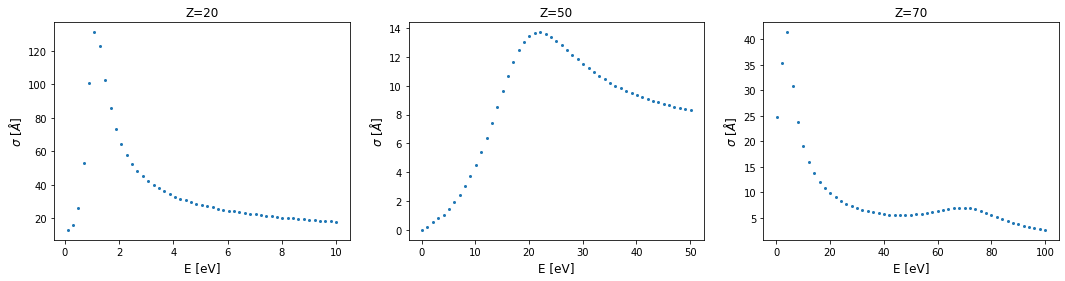

In [9]:
#Plotting the results
E20 = np.linspace(Estart,Estop(Z[0]),npoints)
E50 = np.linspace(Estart,Estop(Z[1]),npoints)
E70 = np.linspace(Estart,Estop(Z[2]),npoints)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

ax1.scatter(E20,cross_section[0,:],s=4)
ax1.set_title('Z=20',fontsize='large')
ax1.set_xlabel("E [eV]",fontsize='large')
ax1.set_ylabel("$\sigma$ $[\AA]$",fontsize='large')

ax2.scatter(E50,cross_section[1,:],s=4)
ax2.set_title('Z=50',fontsize='large')
ax2.set_xlabel("E [eV]",fontsize='large')
ax2.set_ylabel("$\sigma$ $[\AA]$",fontsize='large')

ax3.scatter(E70,cross_section[2,:],s=4)
ax3.set_title('Z=70',fontsize='large')
ax3.set_xlabel("E [eV]",fontsize='large')
ax3.set_ylabel("$\sigma$ $[\AA]$",fontsize='large')

plt.show()

### 6. Plots for the Differential Cross Section

Below we present the differential cross section over it's part where only the s-wave contributes for 3 different incident wave energies.

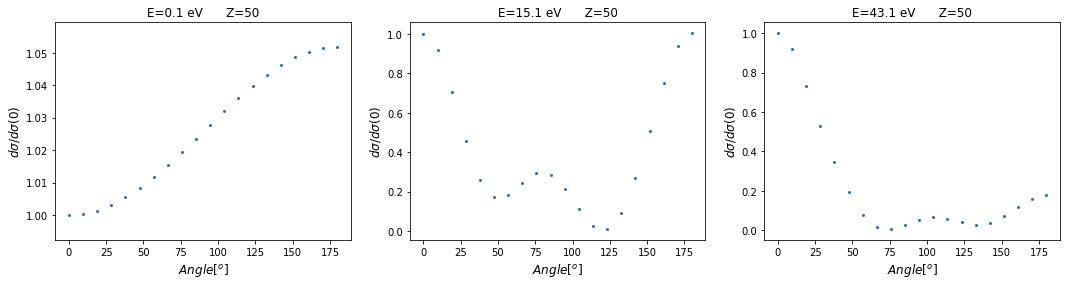

In [10]:
theta_deg = 180/np.pi*theta

fig2, (ax21, ax22, ax23) = plt.subplots(1, 3, figsize=(18, 4))

ax21.scatter(theta_deg,diff_array[0,:],s=4)
ax21.set_title('E=0.1 eV      Z=50',fontsize='large')
ax21.set_xlabel("$Angle [^o]$",fontsize='large')
ax21.set_ylabel("$d\sigma/d\sigma(0)$",fontsize='large')

ax22.scatter(theta_deg,diff_array[1,:],s=4)
ax22.set_title('E=15.1 eV      Z=50',fontsize='large')
ax22.set_xlabel("$Angle [^o]$",fontsize='large')
ax22.set_ylabel("$d\sigma/d\sigma(0)$",fontsize='large')

ax23.scatter(theta_deg,diff_array[2,:],s=4)
ax23.set_title('E=43.1 eV      Z=50',fontsize='large')
ax23.set_xlabel("$Angle [^o]$",fontsize='large')
ax23.set_ylabel("$d\sigma/d\sigma(0)$",fontsize='large')

plt.show()

### 7. References

[1] Masen, S. (2004). $\textit{Computational Quantum Physics II Notes}$. Thessaloniki: Aristotle University of Thessaloniki

[2] Trachanas, S. (2008) $\textit{Quantum Mechanics II}$. Crete: Cretan University Press